Object `performance` not found.


,Player,Tm,Age,G,RushingAtt,RushingYDs,Y/A,RushingTD,Tgt,Rec,ReceivingYDs,Y/R,ReceivingTD,FL,FantasyPoints,FantasyPoints/GM,Usage/GM,TD/Usage,FP per Touch,Yards per TD
0,Christian McCaffrey,CAR,23,16,287,1387,4.83,15,142,116,1005,8.66,4,0,411.2,25.70,26.81,0.04,1.02,125.89
2,Derrick Henry,TEN,25,15,303,1540,5.08,16,24,18,206,11.44,2,3,285.6,19.04,21.80,0.06,0.89,97.00
3,Aaron Jones,GNB,25,16,236,1084,4.59,16,68,49,474,9.67,3,2,290.3,18.14,19.00,0.06,1.02,82.00
4,Ezekiel Elliott,DAL,24,16,301,1357,4.51,12,71,54,420,7.78,2,2,284.7,17.79,23.25,0.04,0.80,126.93
5,Dalvin Cook,MIN,24,14,250,1135,4.54,13,63,53,519,9.79,0,2,265.9,18.99,22.36,0.04,0.88,127.23
8,Nick Chubb,CLE,24,16,298,1494,5.01,8,49,36,278,7.72,0,3,237.2,14.83,21.69,0.02,0.71,221.50
10,Mark Ingram,BAL,30,15,202,1018,5.04,10,29,26,247,9.50,5,2,225.5,15.03,15.40,0.06,0.99,84.33
16,Chris Carson,SEA,25,15,278,1230,4.42,7,47,37,266,7.19,2,4,214.1,14.27,21.67,0.03,0.68,166.22
20,Saquon Barkley,NYG,22,13,217,1003,4.62,6,73,52,438,8.42,2,0,218.1,16.78,22.31,0.03,0.81,180.12
22,Joe Mixon,CIN,23,16,278,1137,4.09,5,45,35,287,8.20,3,0,207.9,12.99,20.19,0.02,0.66,178.00


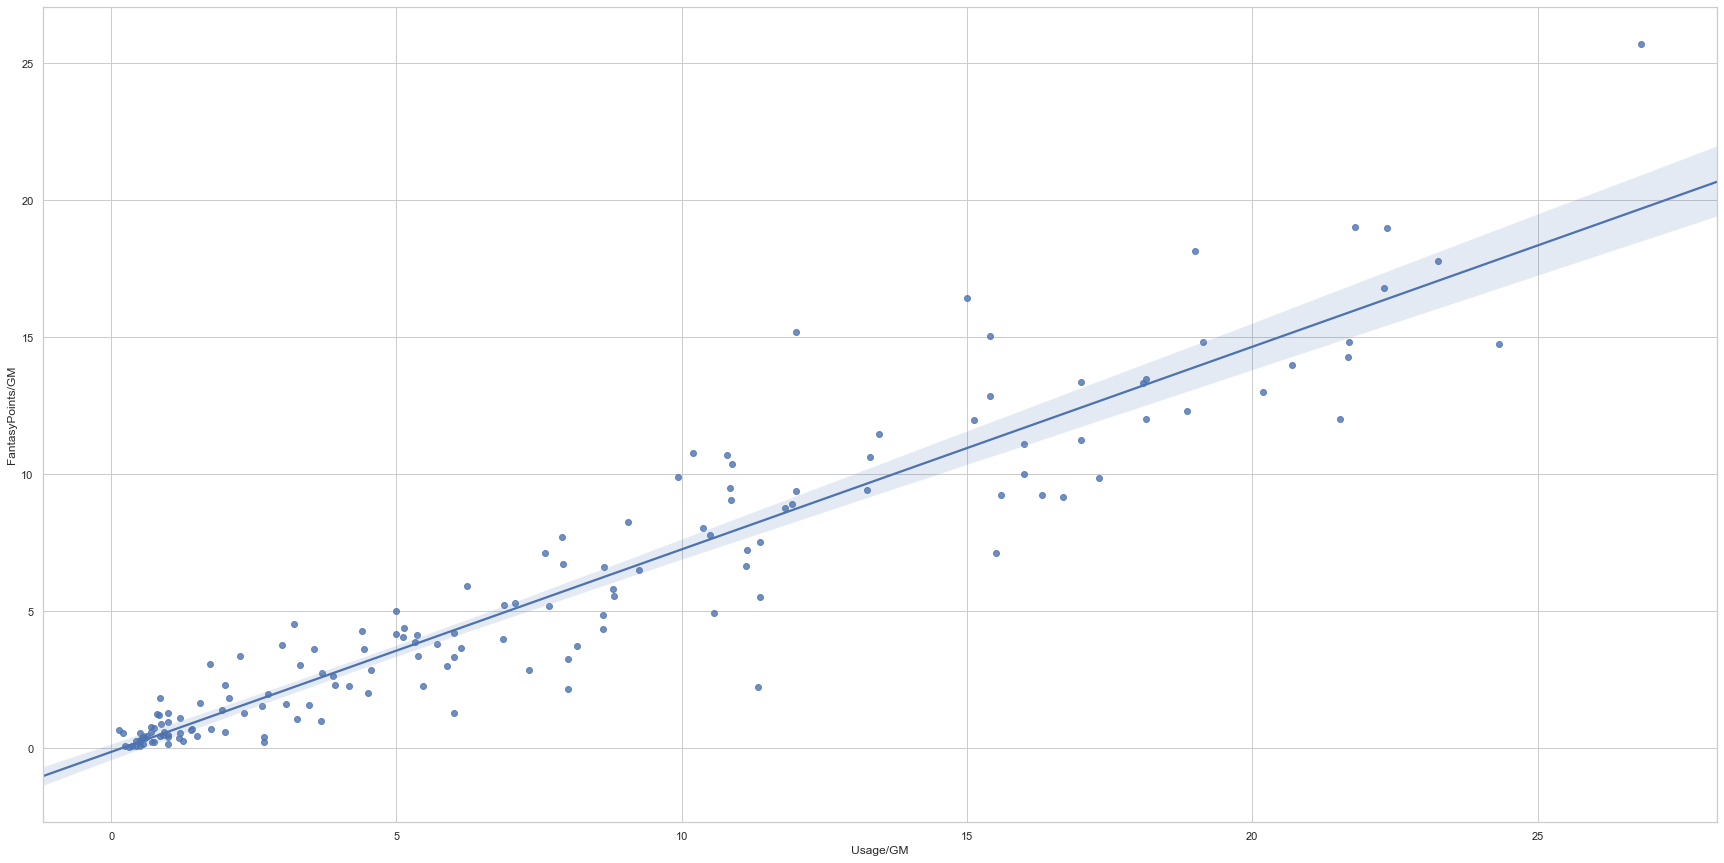

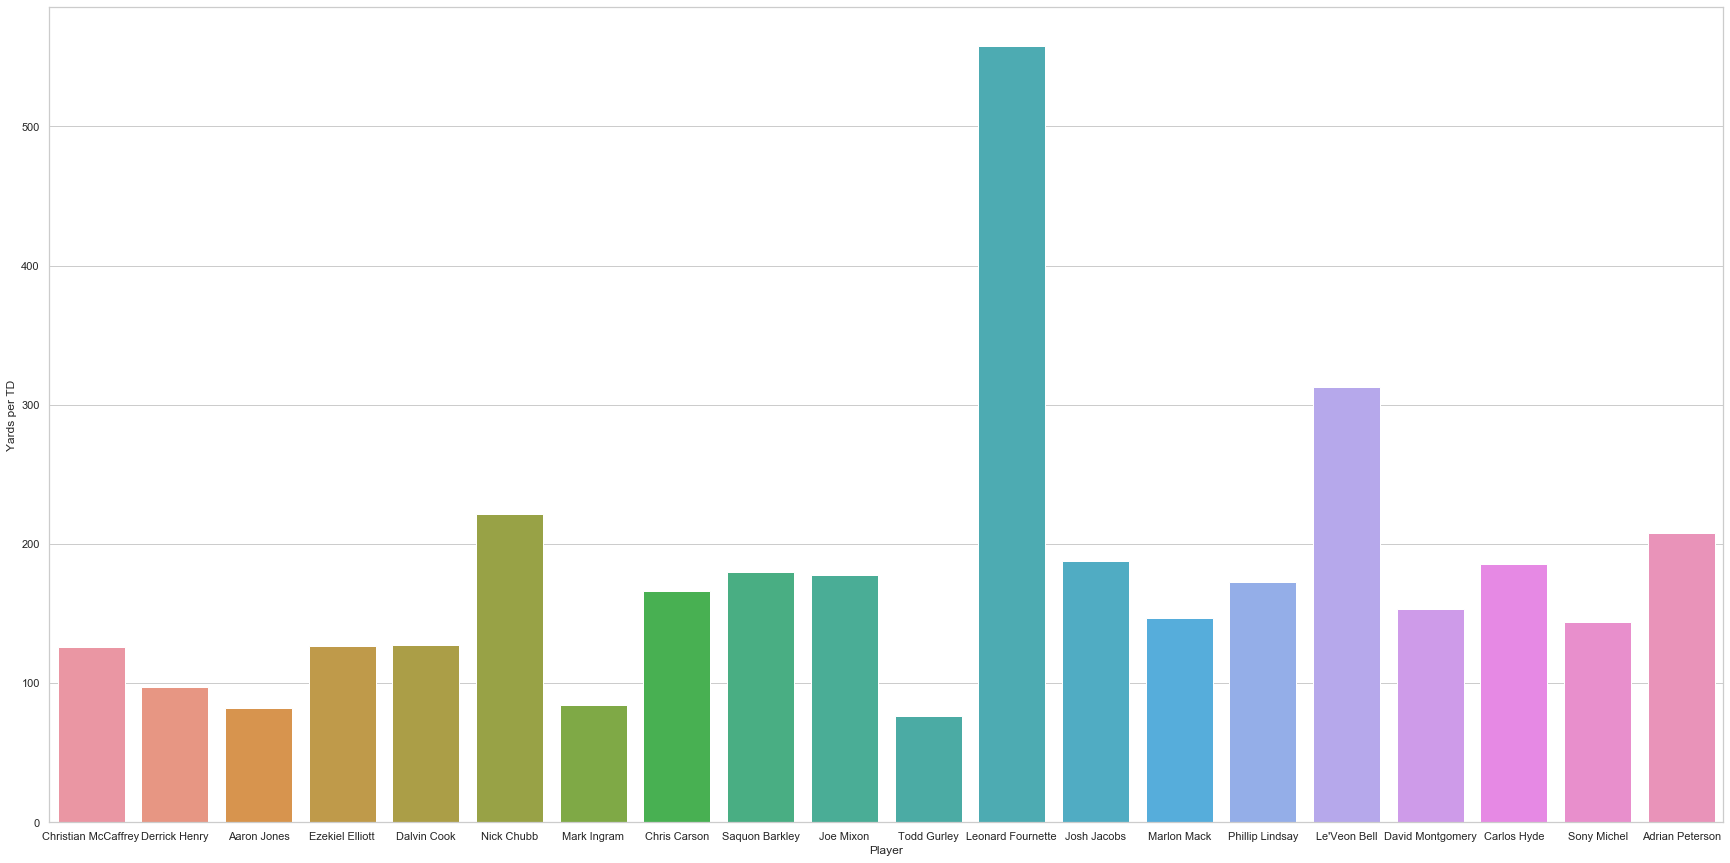

In [13]:
import pandas as pd 
import seaborn as sns
from matplotlib import pyplot as plt


#import our CSV file
df = pd.read_csv('2019.csv')

#drop unneccessary columns
df.drop(['Rk', '2PM', '2PP', 'FantPt', 'DKPt', 'FDPt', 'VBD', 'PosRank', 'OvRank', 'PPR', 'Fmb', 'GS'], axis=1, inplace=True)

#fix name formatting
df['Player'] = df['Player'].apply(lambda x: x.split('*')[0]).apply(lambda x: x.split('\\')[0])

#rename columns
df.rename({
    'TD': 'PassingTD',
    'TD.1': 'RushingTD',
    'TD.2': 'ReceivingTD',
    'TD.3': 'TotalTD',
    'Yds': 'PassingYDs',
    'Yds.1': 'RushingYDs',
    'Yds.2': 'ReceivingYDs',
    'Att': 'PassingAtt',
    'Att.1': 'RushingAtt'
}, axis=1, inplace=True)

#seperate dataframes based off position
rb_df = df[df['FantPos'] == 'RB']
qb_df = df[df['FantPos'] == 'QB']
wr_df = df[df['FantPos'] == 'WR']
te_df = df[df['FantPos'] == 'TE']

rushing_columns = ['RushingAtt', 'RushingYDs', 'Y/A', 'RushingTD',]
receiving_columns = ['Tgt', 'Rec', 'ReceivingYDs', 'Y/R', 'ReceivingTD']
passing_columns = ['PassingAtt', 'PassingYDs', 'PassingTD', 'Int']

def transform_columns(df, new_column_list):
    df = df[['Player','Tm', 'Age', 'G'] + new_column_list + ['FL']]
    return df

rb_df = transform_columns(rb_df, rushing_columns+receiving_columns)
wr_df = transform_columns(wr_df, rushing_columns+receiving_columns)
te_df = transform_columns(te_df, receiving_columns)
qb_df = transform_columns(qb_df, passing_columns)

rb_df.head()

rb_df['FantasyPoints'] = (rb_df['RushingYDs']*0.1 + rb_df['RushingTD']*6 + rb_df['Rec']*.5
                          + rb_df['ReceivingYDs']*0.1 + rb_df ['ReceivingTD']*6 - rb_df['FL']*2)
rb_df['FantasyPoints/GM'] = rb_df['FantasyPoints']/rb_df['G']
rb_df['FantasyPoints/GM'] = rb_df['FantasyPoints/GM'].apply(lambda x: round(x, 2))

#Create new column for usage per game. Usage is defined as # of targets + carries
rb_df['Usage/GM'] = (rb_df['RushingAtt'] + rb_df['Tgt'])/rb_df['G']
#round each row value to two decimal placesnd(x, 2))
rb_df['Usage/GM'] = rb_df['Usage/GM'].apply(lambda x: round(x, 2))

#just for syling. We imported seaborn earlier as sns.
sns.set_style('whitegrid')

#create a canvas with matplotlib
fig, ax = plt.subplots()
fig.set_size_inches(30, 15)

#basic regression scatter plot with trendline
plot = sns.regplot(
    x=rb_df['Usage/GM'], 
    y=rb_df['FantasyPoints/GM'],
    scatter=True,)

How does efficiency correlate to fantasy football performance?
rb_df['TD/Usage'] = (rb_df['RushingTD']+ rb_df['ReceivingTD'])/(rb_df['RushingAtt'] + rb_df['Tgt'])
rb_df['FP per Touch']= (rb_df['FantasyPoints'])/(rb_df['RushingAtt'] + rb_df['Rec'])
rb_df['Yards per TD'] = (rb_df['RushingYDs']+ rb_df['ReceivingYDs'])/(rb_df['ReceivingTD'] + rb_df['RushingTD']).apply(lambda x: round(x, 2))
rb_df['FP per Touch']=rb_df['FP per Touch'].apply(lambda x: round(x, 2))
rb_df['Yards per TD']=rb_df['Yards per TD'].apply(lambda x: round(x, 2))
rb_df['TD/Usage']=rb_df['TD/Usage'].apply(lambda x: round(x, 2))
wr_df['Efficeny']=wr_df['Rec']/wr_df['Tgt']
wr_df['Fantasy Points']=(wr_df['RushingYDs']*0.1 + wr_df['RushingTD']*6 + wr_df['Rec']*.5
                          + wr_df['ReceivingYDs']*0.1 + wr_df ['ReceivingTD']*6 - wr_df['FL']*2)
#Make sure there is an adequete sample size

fig, ax = plt.subplots()
fig.set_size_inches(30, 15)

wr_df = wr_df[wr_df['Rec'] > 40]
rb_df = rb_df[rb_df['RushingAtt'] > 200]

sns.set(style="whitegrid")
sns.barplot(x=rb_df['Player'], y=rb_df['Yards per TD'])


rb_df.head(20)